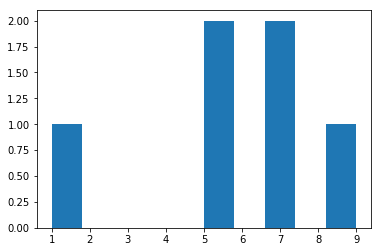

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist([1,5,5,7,7,9])
plt.show()

In [3]:
from nltk.tokenize import word_tokenize
words = word_tokenize("This is a pretty cool tool!")
word_length = [len(w) for w in words]

In [4]:
word_length

[4, 2, 1, 6, 4, 4, 1]

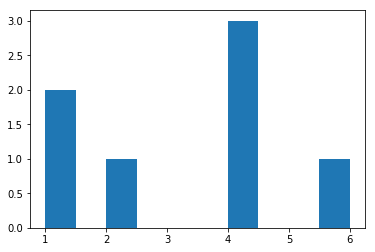

In [7]:
plt.hist(word_length)
plt.show()

In [ ]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

#### Word counts with BOW

In [8]:
text = "The cat is in the box. The cat likes the box. The box is over the cat"

In [10]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [14]:
counter = Counter(word_tokenize(text))

In [17]:
counter

Counter({'.': 2,
         'The': 3,
         'box': 3,
         'cat': 3,
         'in': 1,
         'is': 2,
         'likes': 1,
         'over': 1,
         'the': 3})

In [16]:
counter.most_common(3)

[('The', 3), ('cat', 3), ('the', 3)]

In [ ]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

### Simple text pre processing

create BOW
Lowercasing
shorten words to their room - Lemmatization/Stemming
Remove stopwords, punctuation or unwanted tokens like rarely appearing words
experiement with combination of these

In [18]:
from nltk.corpus import stopwords

In [19]:
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]

In [20]:
tokens

['the',
 'cat',
 'is',
 'in',
 'the',
 'box',
 'the',
 'cat',
 'likes',
 'the',
 'box',
 'the',
 'box',
 'is',
 'over',
 'the',
 'cat']

In [21]:
no_stops = [t for t in tokens if t not in stopwords.words('english')]

In [22]:
no_stops

['cat', 'box', 'cat', 'likes', 'box', 'box', 'cat']

In [ ]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

In [23]:
from gensim.corpora.dictionary import Dictionary
my_docs = ['The movie was about a speceship and aliens.',
           'I really liked the movie.',
           'Awesome action scenes, but boring characters.',
           'The movie was aweful! I hate the alien films.',
           'Space is cool! I liked the movie.',
           'More space films, please.']

tokenized_docs = [word_tokenize(doc.lower()) for doc in my_docs]

In [24]:
tokenized_docs

[['the', 'movie', 'was', 'about', 'a', 'speceship', 'and', 'aliens', '.'],
 ['i', 'really', 'liked', 'the', 'movie', '.'],
 ['awesome', 'action', 'scenes', ',', 'but', 'boring', 'characters', '.'],
 ['the',
  'movie',
  'was',
  'aweful',
  '!',
  'i',
  'hate',
  'the',
  'alien',
  'films',
  '.'],
 ['space', 'is', 'cool', '!', 'i', 'liked', 'the', 'movie', '.'],
 ['more', 'space', 'films', ',', 'please', '.']]

In [25]:
dictionary = Dictionary(tokenized_docs)

In [26]:
dictionary

In [28]:
dictionary.token2id

{'!': 19,
 ',': 12,
 '.': 0,
 'a': 1,
 'about': 2,
 'action': 13,
 'alien': 20,
 'aliens': 3,
 'and': 4,
 'aweful': 21,
 'awesome': 14,
 'boring': 15,
 'but': 16,
 'characters': 17,
 'cool': 24,
 'films': 22,
 'hate': 23,
 'i': 9,
 'is': 25,
 'liked': 10,
 'more': 27,
 'movie': 5,
 'please': 28,
 'really': 11,
 'scenes': 18,
 'space': 26,
 'speceship': 6,
 'the': 7,
 'was': 8}

In [30]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [31]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1)], [(0, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(0, 1), (5, 1), (7, 2), (8, 1), (9, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (19, 1), (24, 1), (25, 1), (26, 1)], [(0, 1), (12, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]


In [ ]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

In [ ]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(word_id, word_count)

### Term frequency - inverse document frequency

In [ ]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf(corpus[1])

In [ ]:
# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

In [ ]:
### Named entity recognition (NER)

tagged_sent = nltk.pos_tage(tokenized_sentences)
print(nltk.ne_chunk(tagged_sent)

In [ ]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

In [ ]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### SpaCy

In [32]:
import spacy
nlp = spacy.load('en')

nlp.entity

doc = nlp("""Berlin is the capital of Germany; and the residence of Chancellor of Angela Merkel""")

In [33]:
doc.ents

(Berlin, Germany, Angela Merkel)

In [36]:
print(doc.ents[0], doc.ents[0].label_)

Berlin GPE


In [ ]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

### Multilingual NER with polyglot

In [ ]:
from polyglot.text import Text
ptext = Text(text)

ptext.entities

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of each entity
print(type(ent))

# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]
# Print the entities
print(entities)


# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if ("Márquez" in ent) or ("Gabo" in ent):
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count * 1.0 / len(txt.entities)
print(percentage)

In [ ]:
# Create a set of spaCy entities keeping only their text: spacy_ents
spacy_ents = {e.text for e in doc.ents} 

# Create a set of the intersection between the spacy and polyglot entities: ensemble_ents
ensemble_ents = spacy_ents.intersection(poly_ents)

# Print the common entities
print(ensemble_ents)

# Calculate the number of entities not included in the new ensemble set of entities: num_left_out
num_left_out = len(spacy_ents.union(poly_ents)) - len(ensemble_ents)
print(num_left_out)

### Supervised ML using NLP

In [ ]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
print(df.head())

# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(tfidf_df.columns) - set(count_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

In [ ]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

In [ ]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

In [ ]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    
    

# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])